In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("isaygerardozamora/obd-ii-and-can-based-driving-behavior-dataset")

print("Path to dataset files:", path)

100%|██████████| 30.5M/30.5M [00:14<00:00, 2.26MB/s]

Extracting files...


Path to dataset files: /home/ahmad/.cache/kagglehub/datasets/isaygerardozamora/obd-ii-and-can-based-driving-behavior-dataset/versions/1


In [1]:
!ls

 Data_Driver1.csv   Dataset_explorer.ipynb
 Data_Driver2.csv  'OBD-II Driving Data - Classified.csv'
 Data_Driver3.csv   useful_features.txt


In [1]:
import pandas as pd
import seaborn as sns

# Import Required Libraries
import matplotlib.pyplot as plt

# Load CSV Data
df = pd.read_csv('./OBD-II Driving Data - Classified.csv')

# Featrue Engineering to comply with the test requirements
df['Intake manifold absolute pressure [mbar]'] = df['Intake manifold absolute pressure [kPa]'] * 10
# Create AFR from equivalence ratio (λ)
stoichiometric_ratio = 14.7  # For gasoline
df['AFR'] = df['O2 sensor equivalence ratio (Bank 1 - Sensor 1)'] * stoichiometric_ratio
# Idle detection flag (Fxx)
df['Idle_flag'] = ((df['Absolute throttle position [%]'] == 0) & 
                   (df['Vehicle speed [km/h]'] == 0)).astype(int)

engineered_features = ['Engine RPM [rpm]',
 'Absolute throttle position [%]',
 'Vehicle speed [km/h]',
 'Engine coolant temperature [°C]',
 'O2 sensor equivalence ratio (Bank 1 - Sensor 1)',
 'Intake manifold absolute pressure [kPa]',
 'Ignition timing advance [°]',
 'Intake air temperature [°C]',
 'Battery voltage [V]',
 'Accelerator pedal position D [%]',
 'Engine load [%]',
 'Commanded air-fuel equivalence ratio',
 'Idle_flag']

df = df[engineered_features]

In [7]:
!ls

 Data_Driver1.csv   Dataset_explorer.ipynb
 Data_Driver2.csv  'OBD-II Driving Data - Classified.csv'
 Data_Driver3.csv   useful_features.txt


In [10]:
import pandas as pd
import seaborn as sns

# Import Required Libraries
import matplotlib.pyplot as plt

# Load CSV Data
df = pd.read_csv('./OBD-II Driving Data - Classified.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 555000 entries, (np.float64(13.1), np.float64(18.0)) to (np.float64(13.2), np.float64(18.0))
Data columns (total 33 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Battery voltage [V]                                     555000 non-null  int64  
 1   Engine load [%]                                         555000 non-null  float64
 2   Engine coolant temperature [°C]                         555000 non-null  float64
 3   Short term fuel trim (Bank 1) [%]                       555000 non-null  int64  
 4   Long term fuel trim (Bank 1) [%]                        555000 non-null  int64  
 5   Intake manifold absolute pressure [kPa]                 555000 non-null  int64  
 6   Engine RPM [rpm]                                        555000 non-null  float64
 7   Vehicle speed [km/h]                         

In [9]:
df['Fuel level input [%]'].unique()

array([8216, 8217, 8218, 8219, 8220, 8221, 8222, 8223, 8224, 8225, 8226,
       8227, 8228, 8229, 8230, 8231, 8232, 8233, 8234, 8235, 8236, 8237,
       8238, 8239, 8240, 8241, 8242, 8243, 8244, 8245, 8246, 8247, 8248,
       8249, 8250, 8251, 8252, 8253, 8254, 8255, 8256, 8257, 8258, 8259,
       8260, 8261, 8262, 8263, 8264, 8265, 8266, 8267, 8268, 8269, 8270,
       8271, 8272, 8273, 8274, 8275, 8276, 8277, 8278, 8279, 8280, 8281,
       8282, 8283, 8284, 8285, 8286, 8287, 8288, 8289, 8290, 8291, 8292,
       8293, 8294, 8295, 8296, 8297, 8298, 8299, 8300, 8301])

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 555000 entries, (np.float64(13.1), np.float64(18.0)) to (np.float64(13.2), np.float64(18.0))
Data columns (total 13 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Engine RPM [rpm]                                 555000 non-null  float64
 1   Absolute throttle position [%]                   555000 non-null  int64  
 2   Vehicle speed [km/h]                             555000 non-null  int64  
 3   Engine coolant temperature [°C]                  555000 non-null  float64
 4   O2 sensor equivalence ratio (Bank 1 - Sensor 1)  555000 non-null  int64  
 5   Intake manifold absolute pressure [kPa]          555000 non-null  int64  
 6   Ignition timing advance [°]                      555000 non-null  float64
 7   Intake air temperature [°C]                      555000 non-null  float64
 8   Battery voltage [V]          

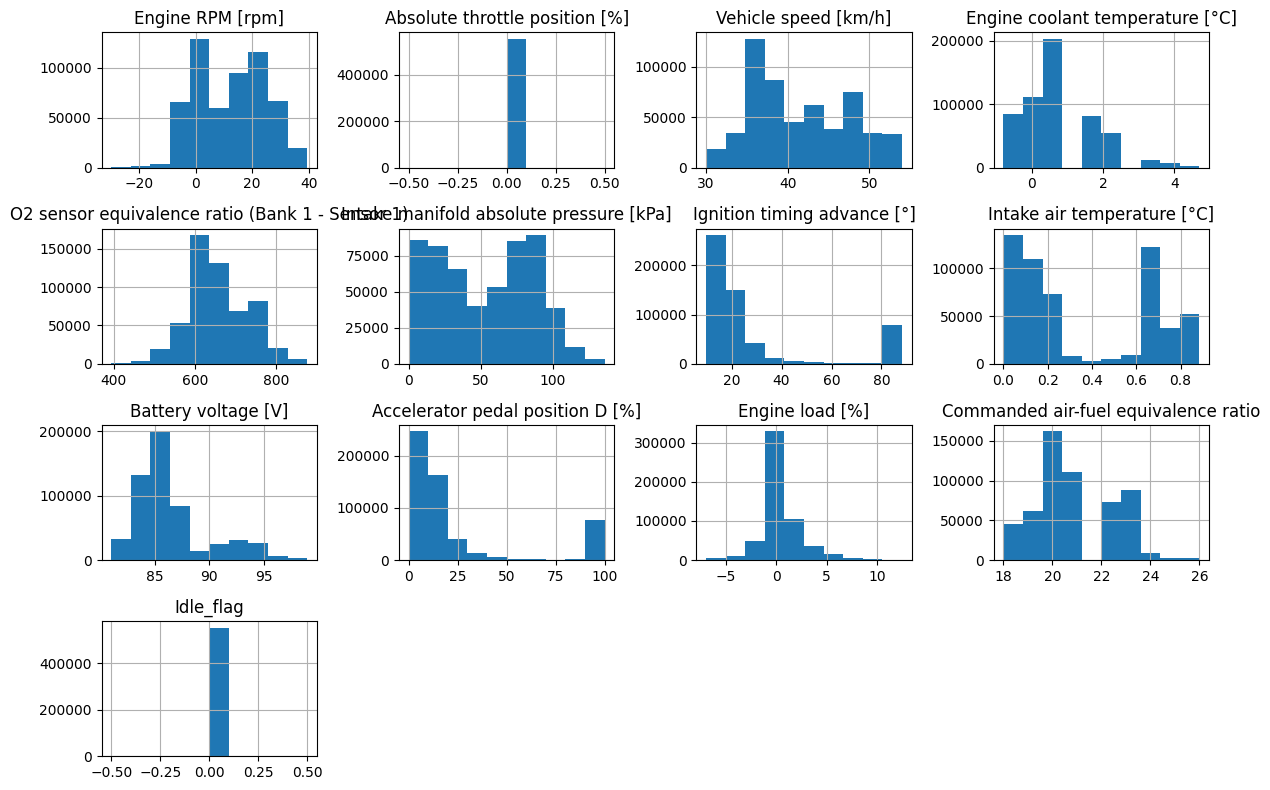

In [2]:
# Display Basic Data Information
print(df.info())
print(df.describe())
print(df.head())

# Visualize Data Distributions
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

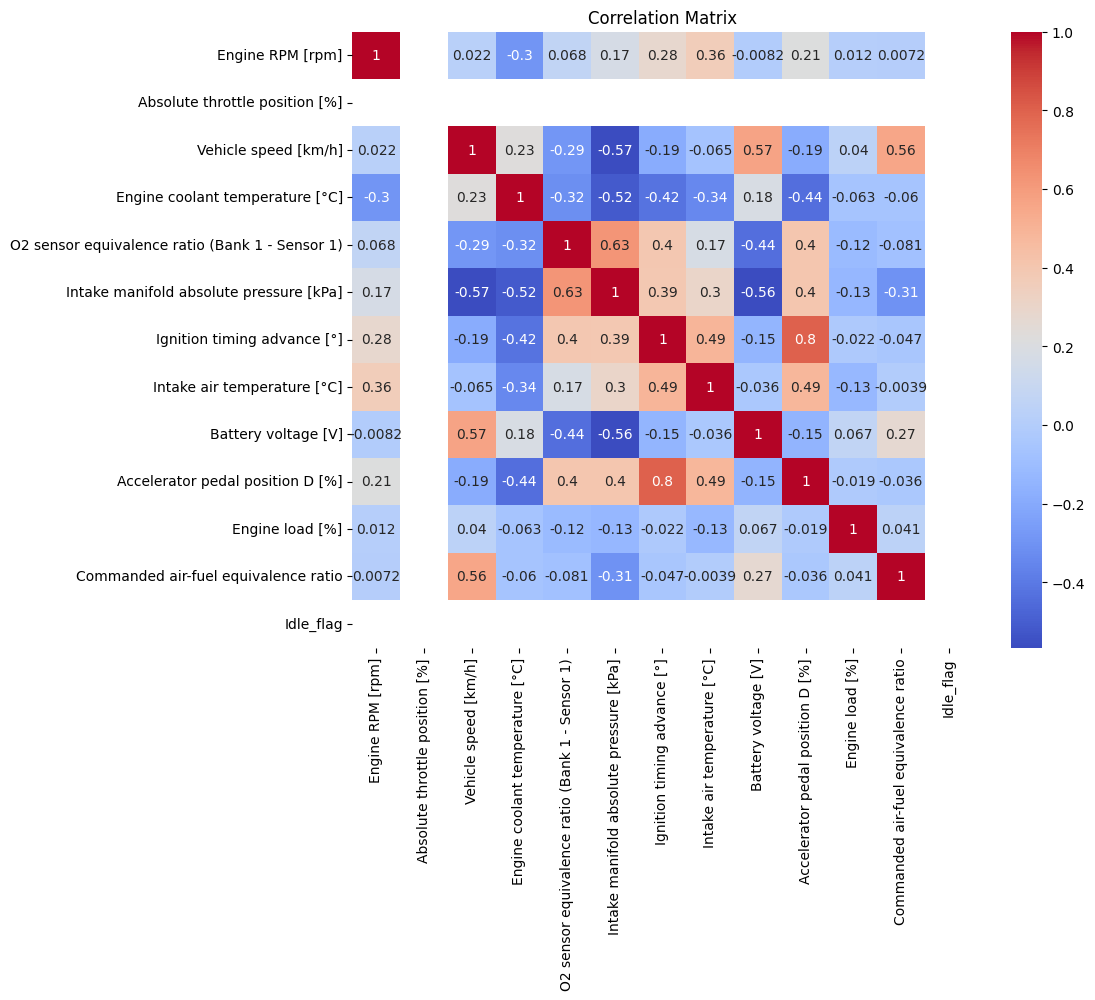

In [3]:
# Visualize Correlations
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot Time Series (if applicable)
# Replace 'date_column' and 'value_column' with actual column names
if 'date_column' in df.columns and 'value_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])
    df.set_index('date_column')['value_column'].plot(figsize=(12, 6))
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

In [4]:
df.columns

Index(['Engine RPM [rpm]', 'Absolute throttle position [%]',
       'Vehicle speed [km/h]', 'Engine coolant temperature [°C]',
       'O2 sensor equivalence ratio (Bank 1 - Sensor 1)',
       'Intake manifold absolute pressure [kPa]',
       'Ignition timing advance [°]', 'Intake air temperature [°C]',
       'Battery voltage [V]', 'Accelerator pedal position D [%]',
       'Engine load [%]', 'Commanded air-fuel equivalence ratio', 'Idle_flag'],
      dtype='object')